In [ ]:
%pip install cantera

In [ ]:
%pip install matplotlib

In [287]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

gas=ct.Solution('gri30.yaml')

data_nratio=[]
data_pmin=[]
data_pmax=[]

In [288]:
def explosion_deltaP(A,B,C):
  gas.TPX=1000,ct.one_atm,{'H2':A,'O2':B,'N2':C}

  r=ct.Reactor(gas)
  sim=ct.ReactorNet([r])

  dt=1e-5
  time=0.0
  end_time=0.002
  pressure_max=gas.P
  time_pmax=0.0
  k=0
  while time<end_time:
      sim.advance(time)
      time+=dt
      if pressure_max<gas.P:
        pressure_max=gas.P
        time_pmax=time
        k=time+(0.2*end_time)
      if time_pmax>k:
        time=k #break
  deltaP=pressure_max/ct.one_atm
  return deltaP

In [289]:
def limits(Nratio):
  phi_bottom=1
  phi_top=3.5

  phi=phi_bottom
  phi_min=0.0
  phi_max=0.0
  dphi=0.05
  k=0.0
  while phi<phi_top:
    A=1.0
    B=1.0*(2/phi)
    C=B*Nratio

    if explosion_deltaP(A,B,C)>1.05:
      if phi_min==0.0:
        phi_min=explosion_deltaP(A,B,C)
      else:
        phi_max=explosion_deltaP(A,B,C)
    phi=phi+dphi
  data_nratio.append(Nratio)
  data_pmin.append(phi_min)
  data_pmax.append(phi_max)

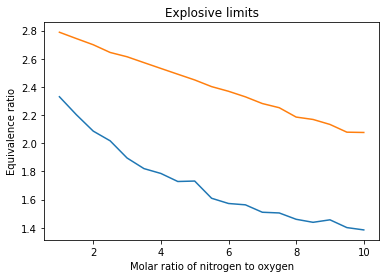

In [290]:
Nratio=1
Nratio_max=10

while Nratio<(Nratio_max+0.5):
  limits(Nratio)
  Nratio+=0.5

plt.plot(data_nratio,data_pmin)
plt.plot(data_nratio,data_pmax)
plt.xlabel('Molar ratio of nitrogen to oxygen')
plt.ylabel('Equivalence ratio')
plt.title('Explosive limits')
plt.show()